In [1]:
import matplotlib.pyplot as pltimport
import xhermes as xh
from boutdata.data import BoutData
from boutdata import collect
import matplotlib.pyplot as plt
import glob     
import re
import numpy as np
import pandas as pd
from heatflux_functions import *

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15


plt.style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams.update({'font.size': 14})


In [2]:
ds = pd.read_pickle('/home/userfs/j/jlb647/w2k/lloyd_sim/hermes-3_simulations/analysis/scripts/flux_limiter_detachment/Data/2024-04_flux_limit_final/Flux_limiter_detachment_ITER_final.pickle')


Comparison of electron heat flux calculated according to explicit SH conduction case (using the method described in BOUT++ documentation https://bout-dev.readthedocs.io/en/latest/user_docs/nonlocal.html) and by integrating the div_q output of the SNB case. 

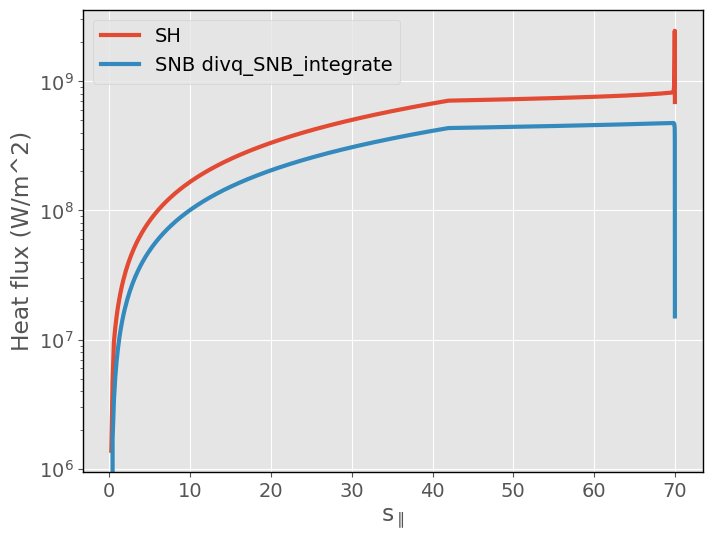

In [3]:
sh = ds[(ds['alpha'] == 'SH') & (ds['neon_frac'] == 0.0)]
snb = ds[(ds['alpha'] == 'SNB') & (ds['neon_frac'] == 0.0)]


x = sh['y']

q_electron = spitzer_q_electron(sh)
q_electron_simply = spitzer_q_electron_simple(sh)
q_electron_int_sh = divq_sh_integrate(snb, False)
q_electron_int_snb = divq_sh_integrate(snb, True)
q_electron_snb = spitzer_q_electron(snb)

fig,ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(x, q_electron, label='SH', linewidth=linewidth)
# ax.plot(x, q_electron_snb, label='SNB spitzer_q_electron (snb)', linewidth=linewidth)
# ax.plot(x, q_electron_simply, label='SH simple', linewidth=linewidth)
ax.plot(x, q_electron_int_snb, label='SNB divq_SNB_integrate', linewidth=linewidth)
# ax.plot(x, q_electron_int_sh, label='SNB divq_SH_integrate', linewidth=linewidth)
ax.set_yscale('log')
ax.set_ylabel('Heat flux (W/m^2)')
ax.set_xlabel(r's$_{\parallel}$')
ax.legend()

I then want to compare this to the input power that we inject upto the x-point, and check that the ion+electron spitzer heatflux adds to this

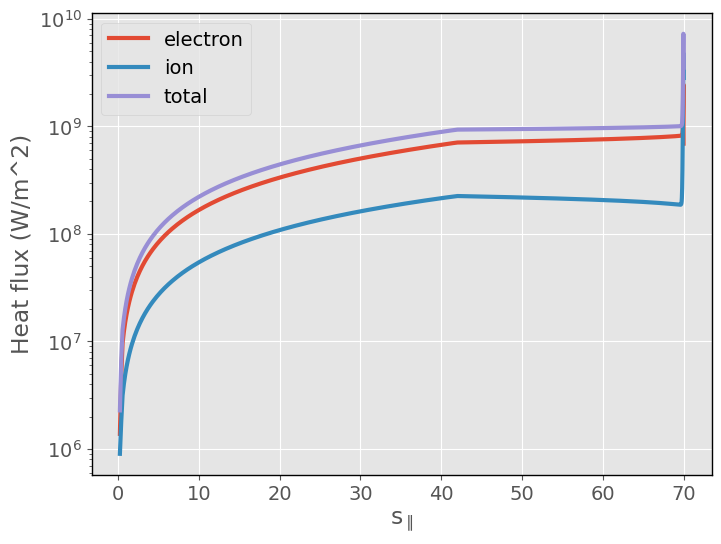

In [4]:
sh = ds[(ds['alpha'] == 'SH') & (ds['neon_frac'] == 0.0)]

x = sh['y']
q_electron = spitzer_q_electron(sh)
q_ion = spitzer_q_ion(sh)

q_total = q_electron + q_ion

fig,ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(x, q_electron, label='electron', linewidth=linewidth)
ax.plot(x, q_ion, label='ion', linewidth=linewidth)
ax.plot(x, q_total, label='total', linewidth=linewidth)
ax.set_yscale('log')
ax.set_ylabel('Heat flux (W/m^2)')
ax.set_xlabel(r's$_{\parallel}$')
ax.legend()

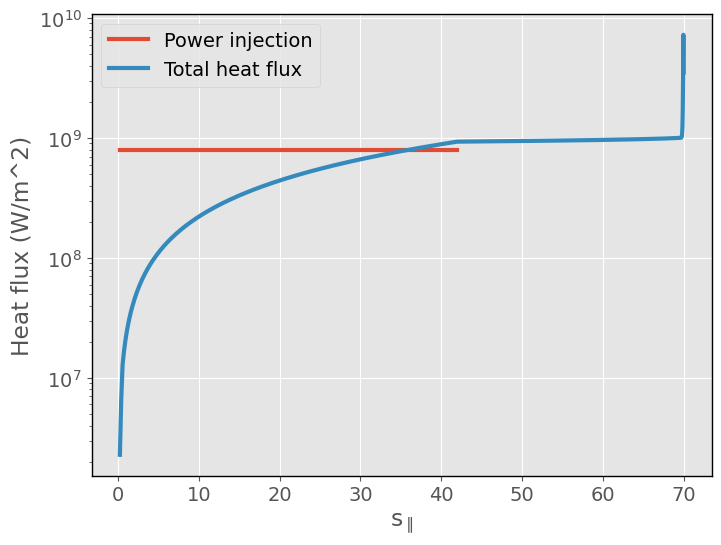

In [5]:
import numpy as np
x = sh['y']

x_point = 42
x_point_index = np.argmin(np.abs(x - x_point))


power_injection_electrons = np.array([4e8]*len(x[:x_point_index]))
power_injection_ions = np.array([4e8]*len(x[:x_point_index]))
power_injection_total = power_injection_electrons + power_injection_ions
power_injection_total = power_injection_total

fig,ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(x[:x_point_index], power_injection_total, label='Power injection', linewidth=linewidth)
ax.plot(x, q_total, label='Total heat flux', linewidth=linewidth)
ax.set_yscale('log')
ax.set_ylabel('Heat flux (W/m^2)')
ax.set_xlabel(r's$_{\parallel}$')
ax.legend()


Text(0.5, 0, 's$_{\\parallel}$')

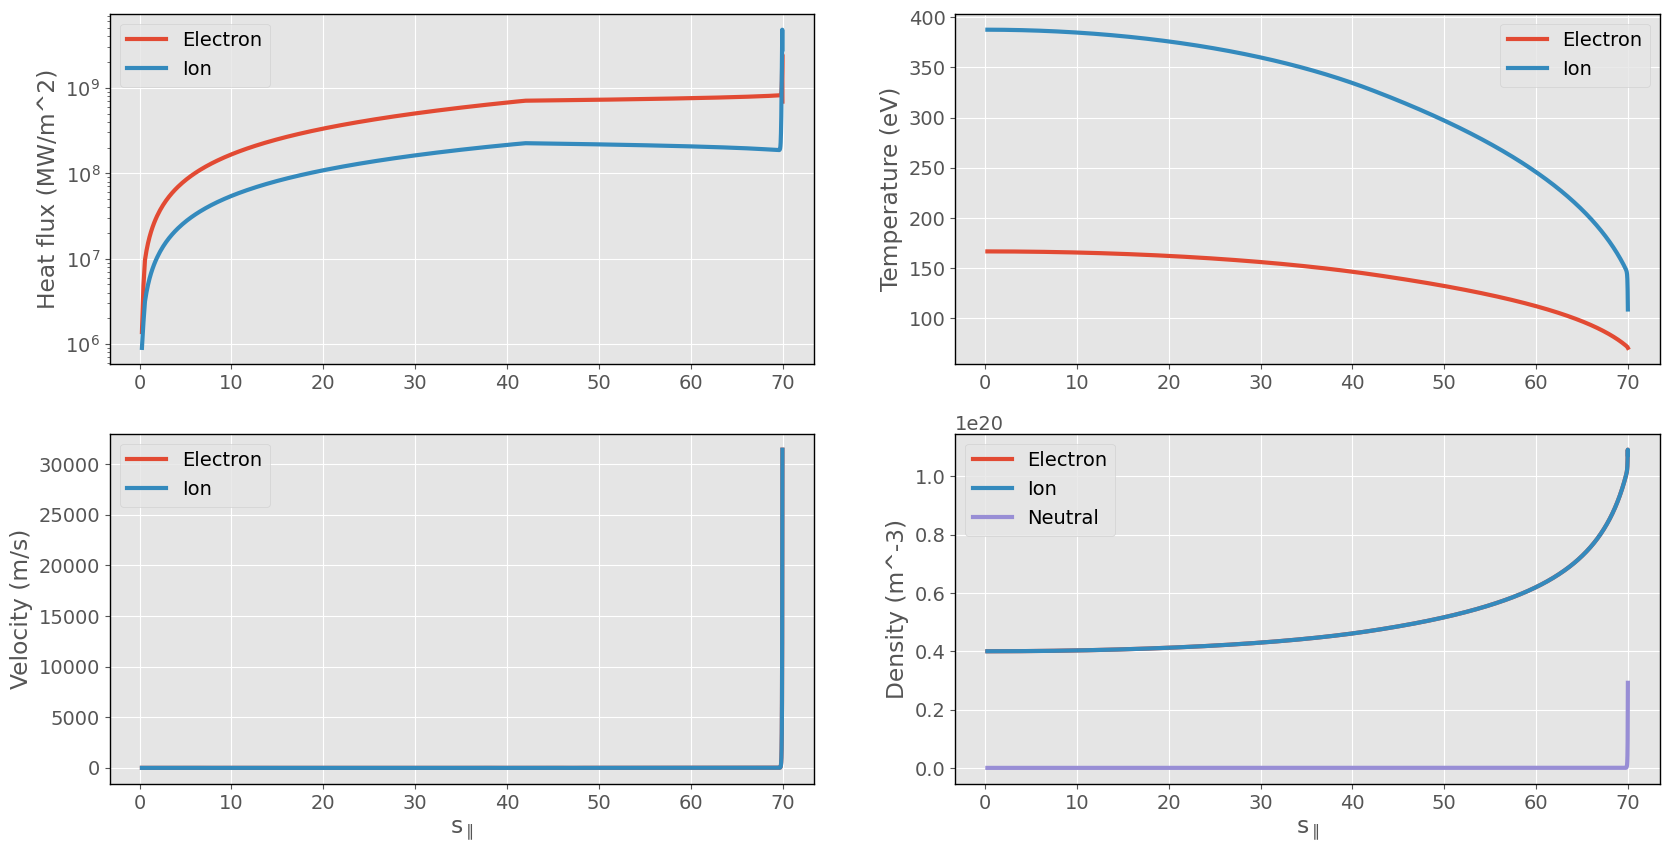

In [6]:
sh = ds[(ds['alpha'] == 'SH') & (ds['neon_frac'] == 0.0)]
x = sh['y']
q_electron = spitzer_q_electron(sh)
q_ion = spitzer_q_ion(sh)

fig,ax = plt.subplots(2,2, figsize=(20, 10))

ax[0,0].plot(x, q_electron, label='Electron', linewidth=linewidth)
# plt.yscale('log')
ax[0,0].plot(x, q_ion, label='Ion', linewidth=linewidth)
ax[0,0].set_ylabel('Heat flux (MW/m^2)')
ax[0,0].set_yscale('log')
ax[0,0].legend()

ax[0,1].plot(x, sh['Te'], label='Electron', linewidth=linewidth)
ax[0,1].plot(x, sh['Td+'], label='Ion', linewidth=linewidth)
ax[0,1].legend()
ax[0,1].set_ylabel('Temperature (eV)')

ax[1,0].plot(x, sh['Ve'], label='Electron', linewidth=linewidth)
ax[1,0].plot(x, sh['Vd+'], label='Ion', linewidth=linewidth)
ax[1,0].set_ylabel('Velocity (m/s)')
ax[1,0].legend()
ax[1,0].set_xlabel(r's$_{\parallel}$')


ax[1,1].plot(x, sh['Ne'], label='Electron', linewidth=linewidth)
ax[1,1].plot(x, sh['Nd+'], label='Ion', linewidth=linewidth)
ax[1,1].plot(x, sh['Nd'], label='Neutral', linewidth=linewidth)
ax[1,1].legend()
ax[1,1].set_ylabel('Density (m^-3)')
ax[1,1].set_xlabel(r's$_{\parallel}$')

0         -0.519024
1         -0.647140
2         -0.779643
3         -0.773379
4         -0.615890
           ...     
793     4265.479758
794     5821.101662
795     7982.715670
796    10782.091259
797    12656.456276
Length: 798, dtype: float64


(0.0, 10.0)

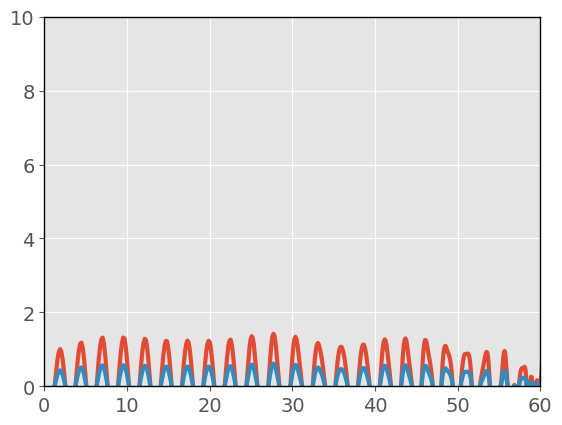

In [7]:
ion_conv = q_convective_ion(sh)
electron_conv = q_convective_electron(sh)

print(ion_conv)


plt.plot(x, ion_conv, label='Ion', linewidth=linewidth)
plt.plot(x, electron_conv, label='Electron', linewidth=linewidth)
plt.xlim(0,60)
plt.ylim(0,10)

# Testing SH ion flux models 

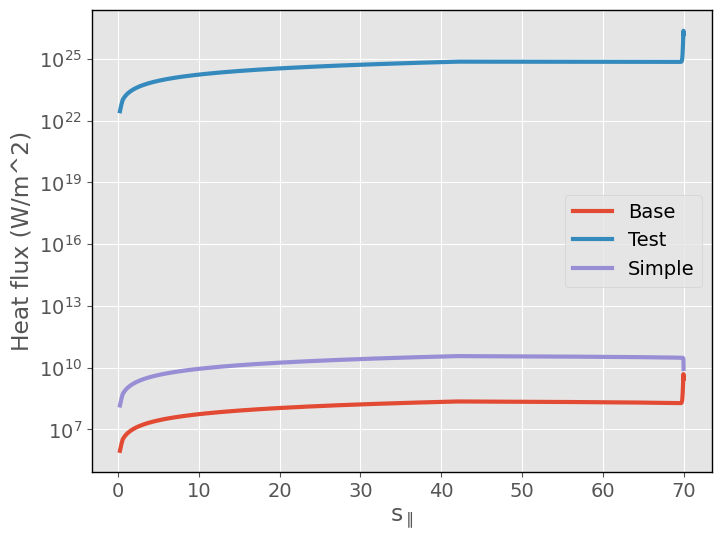

In [8]:
sh = ds[(ds['alpha'] == 'SH') & (ds['neon_frac'] == 0.0)]

x = sh['y']

q_ion_base = spitzer_q_ion(sh)

q_ion_test = test_spitzer_q_ion(sh)

q_ion_simple = spitzer_q_ion_simple(sh)

fig,ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(x, q_ion_base, label='Base', linewidth=linewidth)
ax.plot(x, q_ion_test, label='Test', linewidth=linewidth)
ax.plot(x, q_ion_simple, label='Simple', linewidth=linewidth)
ax.set_yscale('log')
ax.set_ylabel('Heat flux (W/m^2)')
ax.set_xlabel(r's$_{\parallel}$')
ax.legend()


Pretty clear that the ion thermal speed is important here... 